## Importeren packages

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
# import seaborn as sns
import matplotlib.colors as colors
import os

# import scipy.io as io
# import scipy.interpolate as inter
# import scipy.optimize as opt
import sympy as sp

import math
import pandas as pd

#plt.style.use(['gruvboxd_style_theme', 'gruvboxd_color_theme'])

%matplotlib notebook

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\style\core.py:201: UserWarning: In C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\beaver_color_theme.mplstyle: Bad val "'" on line #1
	"axes.prop_cycle : '#d8d8d8', '#969696', '#cc0000', '#33b2b2'"
	in file "C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\beaver_color_theme.mplstyle"
	Key axes.prop_cycle: ''' is not a valid cycler construction: EOL while scanning string literal (<string>, line 1)
  warnings.warn(message)


## Importeren data

In [2]:
data_4 = pd.read_csv('opdracht 4.txt', delimiter = '\t')

In [3]:
data_3 = pd.read_csv('opdracht 3.txt', delimiter = '\t')

## verwerken data opdracht 3

In [4]:
# waardes gebruikt in het experiment
L = 2.20e-3
C = 1.00e-5
R = 100

De theoretisch verwachte waarde van de resonantiefrequentie:

In [5]:
f0 = 1/(np.sqrt(L*C)*2*np.pi)
display("resonantiefrequentie: %.2f" %f0)

'resonantiefrequentie: 1073.02'

De gemiddeld gemeten waarde en de fout hierop

In [7]:
# gemiddelde waarde resonantiefrequentie
f_avg = data_3['resonantiefrequentie'].mean()

# berekenen standaardafwijking op metingen
metingen = data_3['resonantiefrequentie'].values

# som van de kwadraten van de afwijkingen van het gemiddelde
squares_sum = np.dot(metingen-f_avg, metingen-f_avg)
stdv = np.sqrt(squares_sum/(len(metingen-1)))

display('gemeten resonantiefrequentie: %.0f +- %.0f' %(f_avg, stdv))

'gemeten resonantiefrequentie: 1033 +- 24'

## Verwerken data opdracht 4

In [23]:
# functie om phi te bepalen uit omega, L, R en C. (30.29a in Giancoli)
def phi(omega, l=1, r=1, c=1):
    return np.arctan((omega*l-1/(omega*c))/r)

# de fout op phi, voor de gegeven waarden l, r en c rekenen we een 5% fout
def delta_phi(omega, l=1, r=1, c=1, domega=2*np.pi*50, dl=1.1e-4, dr=5, dc=5e-7):
    d_2 = 1/(1+np.tan(phi(omega, l, r, c))**2)*((omega*dl/r)**2 + (dc/(omega*r*c**2))**2 + (l*domega/r+domega/omega**2*r*c)**2 + ((omega*l-1/(omega*c))*dr/r**2)**2)
    return np.sqrt(d_2)

In [9]:
# waardes gebruikt in het experiment
L = 2.20e-3
C = 1.00e-5
R = 100

*plotten data met fouten op de metingen*

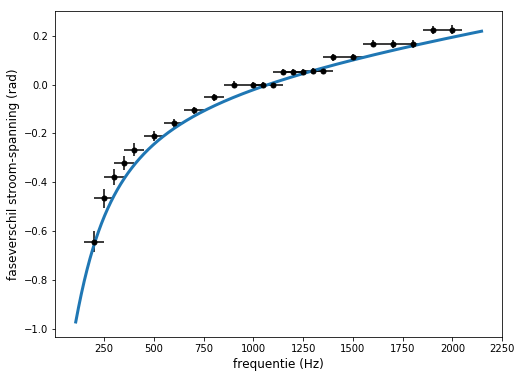

In [40]:
# berekenen theoretische resonantiefrequentie
f0 = 1/(np.sqrt(L*C)*2*np.pi)

# theoretische curve tussen f0/4 en f0*2
freq = np.linspace(f0/10, 2*f0, 2000)
phi_theoretisch = phi(2*np.pi*freq, L, R, C)

# plotten theoretische curve en metingen
fig, ax = plt.subplots(1,1, figsize=(8, 6))

ax.plot((freq), phi_theoretisch, linewidth=3)
#ax.plot((data_4['frequentie']), data_4['phi'], 'o', markersize=8)
ax.errorbar(data_4['frequentie'], data_4['phi'], yerr=delta_phi(2*np.pi*data_4['frequentie'], L, R, C), xerr=50*np.ones_like(data_4['phi']), fmt='o', markersize=5, color='k')

# lay-out en labels
ax.set_xlabel('frequentie (Hz)', size=12)
ax.set_ylabel('faseverschil stroom-spanning (rad)', size=12)
#plt.title('Faseverschil stroom-spanning in functie van frequentie')

plt.show()

#fig.savefig('theorie_data.pdf')
#fig.savefig('theorie_data.png')

*Plotten data met fouten op data en theoretische curve*

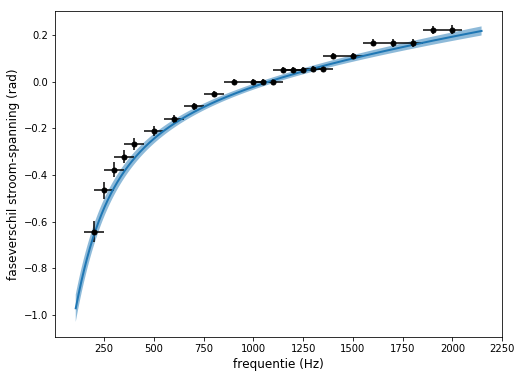

In [41]:
# berekenen theoretische resonantiefrequentie
f0 = 1/(np.sqrt(L*C)*2*np.pi)

# theoretische curve tussen f0/4 en f0*2
freq = np.linspace(f0/10, 2*f0, 2000)
phi_theoretisch = phi(2*np.pi*freq, L, R, C)
fout_theoretisch = delta_phi(2*np.pi*freq, L, R, C)

# plotten theoretische curve en metingen
fig, ax = plt.subplots(1,1, figsize=(8, 6))

ax.plot((freq), phi_theoretisch, linewidth=2)
#ax.plot((data_4['frequentie']), data_4['phi'], 'o', markersize=8)
ax.fill_between(freq, phi_theoretisch - fout_theoretisch, phi_theoretisch + fout_theoretisch, alpha=0.5)
ax.errorbar(data_4['frequentie'], data_4['phi'], yerr=delta_phi(2*np.pi*data_4['frequentie'], L, R, C), xerr=50*np.ones_like(data_4['phi']), fmt='o', markersize=5, color='k')

# lay-out en labels
ax.set_xlabel('frequentie (Hz)', size=12)
ax.set_ylabel('faseverschil stroom-spanning (rad)', size=12)
#plt.title('Faseverschil stroom-spanning in functie van frequentie')

plt.show()

#fig.savefig('theorie_data_fill.pdf')
#fig.savefig('theorie_data_fill.png')

## Tests

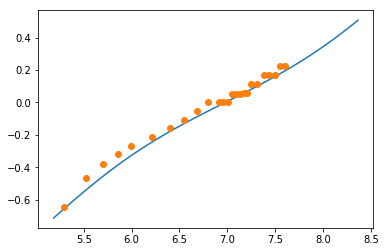

In [11]:
# berekenen theoretische resonantiefrequentie
f0 = 1/(np.sqrt(L*C)*2*np.pi)

# theoretische curve tussen f0/4 en f0*4
freq = np.linspace(f0/6, 4*f0, 2000)
phi_theoretisch = phi(2*np.pi*freq, L, R, C)

# plotten theoretische curve en metingen
fig, ax = plt.subplots(1,1)

ax.plot(np.log(freq), phi_theoretisch)
ax.plot(np.log(data_4['frequentie']), data_4['phi'], 'o')

plt.show()

fig.savefig('data_theoretisch_logaritmisch.png')

In [ ]:
# bereik om een idee te krijgen van de vorm van de curve
omega1 = np.linspace(0, 1, 1000)
omega2 = np.linspace(1, 4, 1000)
phi1 = phi(omega1, 1, 1, 1)
phi2 = phi(omega2, 1, 1, 1)

fig, ax = plt.subplots(1, 1)

ax.plot(omega1, phi1)
ax.plot(omega2, phi2)

plt.show()

In [ ]:
# bereik om een idee te krijgen van de vorm van de curve
T1 = np.linspace(0.1, 1, 1000)
T2 = np.linspace(1, 4, 1000)
phi1 = phi(1/T1, 1, 1, 1)
phi2 = phi(1/T2, 1, 1, 1)

fig, ax = plt.subplots(1, 1)

ax.plot(T1, phi1)
ax.plot(T2, phi2)

plt.show()

In [ ]:
# bereik om een idee te krijgen van de vorm van de curve
E1 = np.linspace(-1, 1, 1000)
phi1 = phi(10**E1, 1, 1, 1)

fig, ax = plt.subplots(1, 1)

ax.plot(E1, phi1)

plt.show()

fig.savefig('Theoretische gestandariseerde plot opdracht 4.png')

In [ ]:
phi(1/4)